# Machine Learning 2023-2024 - UMONS

# Principal Component Analysis

In this lab, we'll see in practice how to use Principal Component Analysis (PCA) to reduce the dimensionality of a dataset, and how to interpret the principal components. To this end, we'll use the "Wisconsin Breast Cancer dataset", which contains diverse characteristics of cancerous cell nuclei, and whether a patient's tumor is malignant (M) or benign (B). In the second part of the lab, we'll see how PCA can be used to compress an image. 

**Load the necessary libraries**

In [1]:
import sklearn 
import pandas as pd 
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import cv2
from sklearn.preprocessing import StandardScaler

**1) Read the dataset, drop the columns 'id' and 'Unnamed : 32', and check whether there are missing values. If any, drop the entire corresponding row.**

In [2]:
df = pd.read_csv('wbcd.csv')


df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
print(df.head())
print(df.isna().sum())
print(df.shape)

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

**2) Select *diagnosis* as the target variable y, and all remaining columns in the dataframe as the predictors variables X.** 

**Standardize the matrix X column-wise. Why is standardizing important in the context of PCA ?**

In [3]:

X = df.drop(['diagnosis'], axis=1)
y = df[['diagnosis']]

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

PCA aims to find the principal component directions which maximize the variance of the projections. If the variables contained in X differ largely in scale, so would their variance. Think about the variance of the **same** measurement taken in kilometers and in meters. The variance for the measurement in meters would be bigger than the one for the measurement in kilometers, while they represent the exact same measurement. As a result PCA will always give more weight to variables having a large scale, and it will discard smaller scale variables. To avoid this issue, we standardize the variables prior to applying PCA, such that they all have mean 0 and unit variance. 

**3) Compute the total variance of the centered variable X.**

In [4]:
TV = X_sc.var(axis=0).sum()
print('Total Variance : {}'.format(TV))

Total Variance : 30.0


Each variable has now unit variance, so the total variance is equal to 30.  

**4) Apply PCA to the standardized dataset X by computing *all* principal components. Make sure you can access to the principal components, the variance explained by each component and the ratio of variance explained by each component. You'll need the `PCA` method of Scikit-learn.**

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X_sc)

##Components 

#pca.components_

##Explained variance

#pca.explained_variance_

##Explained variance ratio 

pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

**5) Create a barplot of the proportion of total variance explained by the first 15 components. What do you observe ?**

**Generate also a barplot of the cumulative ratio of the total variance explained by the first 15 components.**

**Also, what is the proportion of the total variance explained by all the components, and how many components would you need to explain 95% of the variance?**

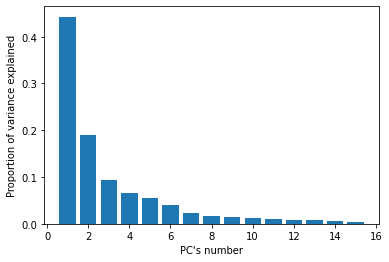

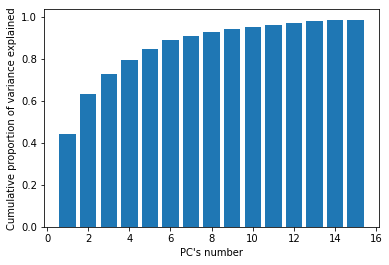

Proportion of total variance explained by the first 10 components : 0.9515688143366667
Proportion of total variance explained by all components : 1.0


In [6]:
fig2, ax2 = plt.subplots()
bins= np.arange(1, 16)
ax2.bar(bins, pca.explained_variance_ratio_[:15])
ax2.set_xlabel('PC\'s number')
ax2.set_ylabel('Proportion of variance explained')
plt.show()

cumsum_variance_explained = np.cumsum(pca.explained_variance_ratio_[:15])
fig3, ax3 = plt.subplots()
bins= np.arange(1, 16)
ax3.bar(bins, cumsum_variance_explained)
ax3.set_xlabel('PC\'s number')
ax3.set_ylabel('Cumulative proportion of variance explained')
plt.show()

print(f'Proportion of total variance explained by the first 10 components : {np.sum(pca.explained_variance_ratio_[:10])}')
print(f'Proportion of total variance explained by all components : {np.sum(pca.explained_variance_ratio_)}')

The ratio of total variance explained by the first component amounts to 44%, the second to 19%, the third to 9.4%, and it keeps on decreasing as we move down the order of principal components. By summing their individual contribution to the ratio of total variance explained, we see that 95% of the 'information' contained in the original dataset (in the sense of variance) is contained in the 10 first principal components, and only 5% of the remaining information is split amongst the remaining 20 principal components. 

**6) Generate a biplot of the component's scores in the space spanned by the first two components.**  

**Color the points depending on their target label ('M' or 'B'). Do you notice anything?**

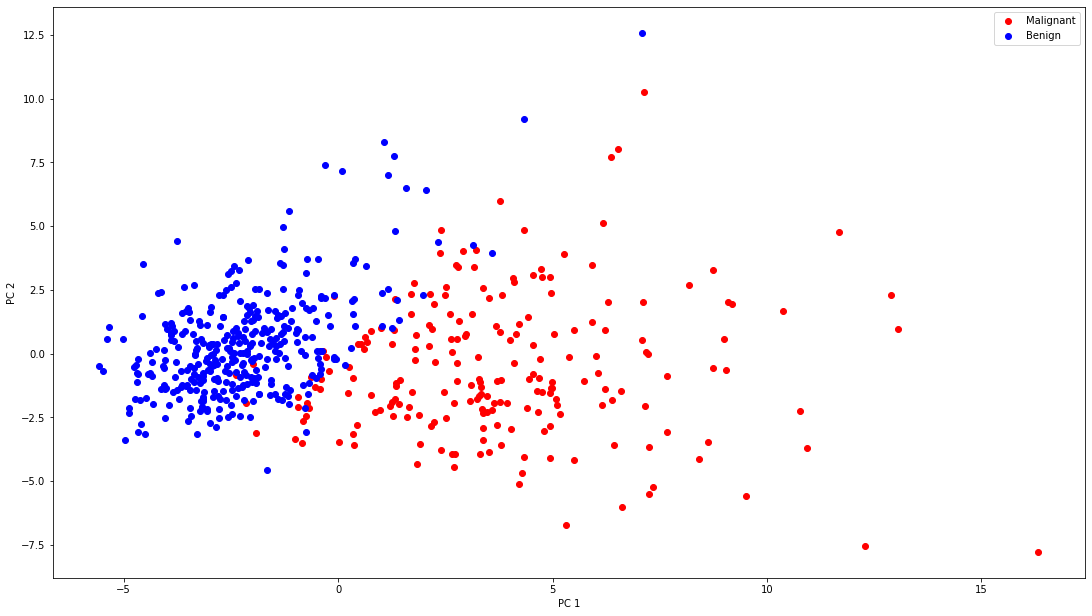

In [7]:
y = df['diagnosis']
idx_m = y == 'M'
idx_b = y == 'B'
X_pca_M = X_pca[idx_m, :]
X_pca_B = X_pca[idx_b, :]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(X_pca_M[:,0], X_pca_M[:,1], color='r', label='Malignant')
ax.scatter(X_pca_B[:,0], X_pca_B[:,1], color='b', label='Benign')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
plt.show()

The projections of the data points in the space spanned by PC1 and PC2 are almost linearly separable. Moreover, the points belonging to the class 'Malignant' seem to be more spread out than the points of the class 'Benign', and their scores along the first principal component axis are (for the most part) positive. On the other hand, almost all the points belonging to the class 'Malignant' have a negative score along the first principal component axis. 

**7) Use the code below to generate a *loading table* for the first two principal components, i.e. a pandas Dataframe which columns are the principal components, and which rows are the loadings for each variable.**

**How do you interpret it?**

In [8]:
features = X.columns
columns = ['PC1', 'PC2']
loadings = pd.DataFrame(data = np.transpose(pca.components_[0:2,:]), 
                  index = features, 
                  columns = columns)
print(loadings)

                              PC1       PC2
radius_mean              0.218902 -0.233857
texture_mean             0.103725 -0.059706
perimeter_mean           0.227537 -0.215181
area_mean                0.220995 -0.231077
smoothness_mean          0.142590  0.186113
compactness_mean         0.239285  0.151892
concavity_mean           0.258400  0.060165
concave points_mean      0.260854 -0.034768
symmetry_mean            0.138167  0.190349
fractal_dimension_mean   0.064363  0.366575
radius_se                0.205979 -0.105552
texture_se               0.017428  0.089980
perimeter_se             0.211326 -0.089457
area_se                  0.202870 -0.152293
smoothness_se            0.014531  0.204430
compactness_se           0.170393  0.232716
concavity_se             0.153590  0.197207
concave points_se        0.183417  0.130322
symmetry_se              0.042498  0.183848
fractal_dimension_se     0.102568  0.280092
radius_worst             0.227997 -0.219866
texture_worst            0.10446

The loadings reveal how each variable influence the principal components. The greater is the value (positive or negative), the greater is the influence. For instance, PC1 is the most influenced by the variable 'concave points_mean', and very much less by the variable 'smoothness_se'. Also, all of the loadings have a positive influence on the first principal component. 

PC2 is mostly influence by the variable 'fractal_dimension_worst', which has a positive loading, and by the variable 'radius_mean', which has a negative loading. On the other hand, it is much less influenced by the variable 'concave points_worst'.  


**8) Use the function below to generate a loading plot. How do you interpret it?**

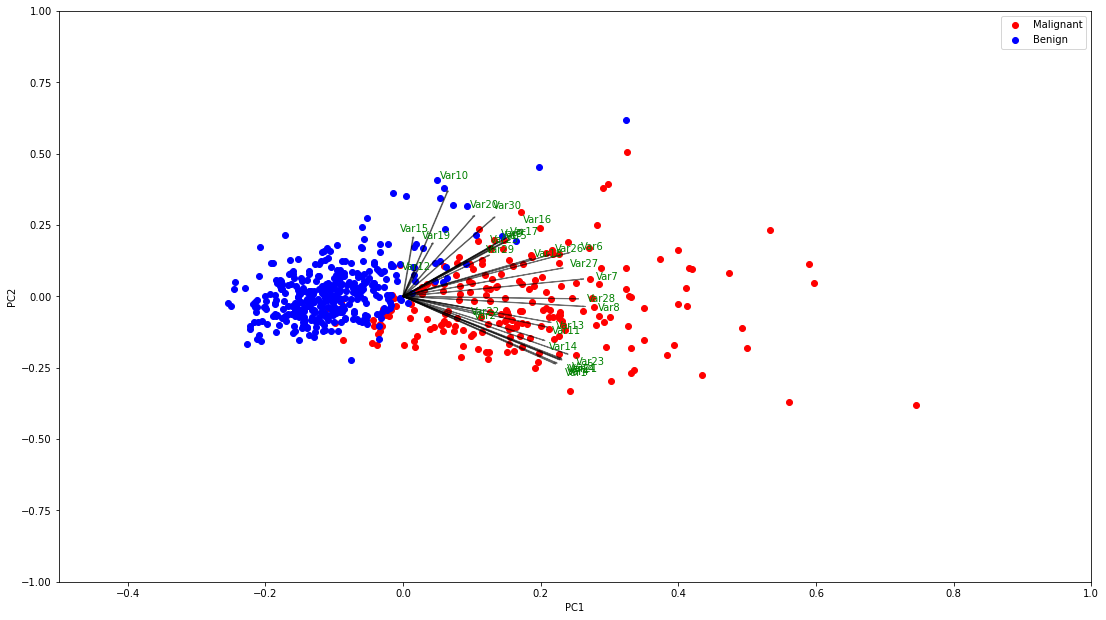

In [9]:
def myplot(score,coeff, y, labels=None, max_comp=None):
    fig, ax = plt.subplots()
    xs = score[:,0]
    ys = score[:,1]
    if max_comp is None:
        n = coeff.shape[0]
    else:
        n = max_comp
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    idx_m = y == 'M'
    idx_b = y == 'B'
    score_M = score[idx_m, :] 
    score_B = score[idx_b, :]
    ax.scatter(score_M[:,0]*scalex, score_M[:,1]*scaley, color='r', label='Malignant')
    ax.scatter(score_B[:,0]*scalex, score_B[:,1]*scaley, color='b', label='Benign')
    ax.legend()
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15 , coeff[i,1] * 1.15 , "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15 , coeff[i,1] * 1.15 , labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.5,1)
    plt.ylim(-1,1)
    ax.set_xlabel("PC{}".format(1))
    ax.set_ylabel("PC{}".format(2))
    fig.set_size_inches(18.5, 10.5)

pca = PCA()
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_sc)

myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]), y, max_comp=None)


plt.show()

The loading plot is just a visual representation of the loading table, and it can be interpreted in the same way. We can see that all loadings have a positive projections along the PC1 axis, and hence, a positive contribution to the first principal component. The greater the vector's projection on each axis, the greater the contribution. 

For instance, consider an observation $(\mathbf{X}_i,y_i)$, where $\mathbf{X}_i \in \mathbb{R}^p$ has been standardized. If $\mathbf{X}_i$ contains only positive values for each of the $p$ variable, then it will surely fall on the positive half of PC1 (as the PC1 loadings are all positive). As most of the points belonging to the class 'Malignant' have a positive projection of the PC1 axis, the associated $y_i$ would be likely to also belong to the class 'Malignant'. Inversely, if the standardized $\mathbf{X}$ contains only negative values for each variable, it will surely fall on the negative half of PC1, and would be likely to belong to the class 'Benign'.

In the avove plot, 'Var1' corresponds to 'radius_mean', 'Var2' to 'texture_mean', etc...

**9) Create a pipeline containing a `StandardScaler`, followed by a `PCA` retaining the first 5 PCs, followed by a `LogisticRegression`.**

**Split the original dataset into a training and a test set following a 80/20 partition, fit the pipeline on the training set, and predict on the test set. Evaluate the test auroc score.**

**Compare the test results obtained with the pipeline to a simple `LogisticRegression` model. Do you notice significant differences?**

In [10]:
scaler = StandardScaler()
pca = PCA(n_components=5)
clf = LogisticRegression()

y.replace({'B':0, 'M':1}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

model_pca = Pipeline(steps=[('scaler', scaler),('pca', pca), ('classifier', clf)])

model_pca.fit(X_train, y_train)

y_pred = model_pca.predict(X_test)

auc_pca = roc_auc_score(y_test, y_pred)

model = Pipeline(steps=[('scaler', scaler), ('classifier', clf)])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)

print('AUROC using PCA : {}'.format(auc_pca))
print('AUROC without using PCA : {}'.format(auc))

AUROC using PCA : 0.9531597332486503
AUROC without using PCA : 0.9637980311209908


The performance of the model trained on only the 5 first PCs is comparable to the performance of the model trained on all predictors. This means that we achieved similar performance, while removing 25 out of the 30 original dimensions of the dataset.

### BONUS : How to use PCA to compress images

**10) We'll now see how PCA can be employed to compress an image. First, load the 'doggo.jpeg' picture using the library matplotlib.**

(1414, 2121, 3)


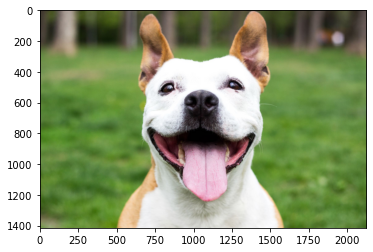

In [11]:
img = plt.imread('doggo.jpeg') 
plt.imshow(img)
print(img.shape)

**11) Split the image into its red, green and blue channels using the method cv2.split(). Then, on each channel, apply a PCA transformation with 1 component. For each channel, also compute the inverse PCA transform (using the pca.inverse_transform() method).**

**Stack the three inverted transforms (one for each channel) back together to form the compressed image, and display the image. Try by increasing the number of principal components until you reach a satisfactory quality.**

In [13]:
red, green, blue = cv2.split(img) 
#initialize PCA with first 20 principal components. You can increase this value. 
pca = PCA(100)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

print(blue_transformed.shape)

(1414, 100)


In [14]:
img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)
print(img_compressed.shape)

(1414, 2121, 3)


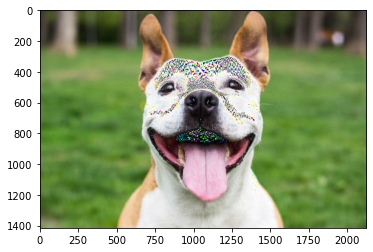

In [15]:
#viewing the compressed image
plt.imshow(img_compressed)

As we increase the number of PCs, the original image gets reconstructed better and better, up to a point at which the difference is not even distinguishable by the human eye. 